In [ ]:
##########################
### [작업1]
### 코렙에서 차트작업시 한글 나오게 하는 작업임
### 이노트 실행후, [런타임-세션다시시작]하고,이 작업1은 다시 실행하지 않아도 됨
### 아래의 [작엄2] 에서 한글 잘 나오면 됨
#########################
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

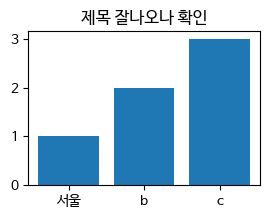

In [1]:
##################################
## [작업2] 한글 차트 한글 잘 나오나 확인용
###################################
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(3,2))
plt.title('제목 잘나오나 확인')
plt.bar(x=['서울','b','c'], height=[1,2,3])
plt.show()

In [10]:
#####################################3
## 설치
############################
!pip install --upgrade openai
!pip install langchain_community
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4


In [ ]:
#########################################
## 오픈 API키
##########################################
from langchain_openai import ChatOpenAI
import os
openai_api_key = 'openai api키로'
os.environ['OPENAI_API_KEY'] = openai_api_key

In [18]:
import pandas as pd

# 데이터 로드
data = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", None],
    "Age": [25, 30, None, 28],
    "Score": [85, 90, 95, None],
    "gender": ["F", "M", "M", "F"]
})

data

,Name,Age,Score,gender
0,Alice,25.0,85.0,F
1,Bob,30.0,90.0,M
2,Charlie,NaN,95.0,M
3,None,28.0,NaN,F


In [6]:
###############################
## 데이터 요약 및 분석 체인
###############################

from langchain_openai import ChatOpenAI
#from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain


# OpenAI API와 LangChain 연동
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.7, max_tokens=256)

# 프롬프트 템플릿 정의
prompt = PromptTemplate(
    template="데이터를 분석하고, 인사이트를 도출하세요: {stats}"
)

# LangChain 체인 생성
chain = LLMChain(llm=llm, prompt=prompt)



<ipython-input-6-cd17508ce857>:20: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)


In [46]:
######################
## 기술통계 분석 체인 생성
######################

st = data.describe()

# 체인 실행
summary = chain.run(stats=st) # st.to_string()와 같음. 문자만 내보냄.뜻
print("-->생성된 요약:")
display(summary)


-->생성된 요약:
이 데이터는 세 명의 사람의 나이와 점수를 보여줍니다. 

평균적으로 이 세 명의 사람은 27.67세이며, 평균 점수는 90입니다. 나이의 표준 편차는 2.52이고, 점수의 표준 편차는 5입니다. 최소 나이는 25세이고 최고 나이는 30세입니다. 최소 점수는 85이고 최고 점수는 95입니다.

25%의 사람들은 26.5세 미만이고 87.5 미만의 점수를 받았습니다. 50%의 사람들은 28세 이하이며, 90의 점수를 받았습니다. 75%의 사람들은 29세 이하이며, 92.5 이하의 점수를 받았습니다.

이 데이터를 통해 젊은 사람일


In [48]:
######################
## 데이터 정보에 대하여
######################

propmpt = data.describe()
print(propmpt)

# 체인 실행
summary = chain.run(stats=st)
print("-->생성된 요약:")
print(summary)


             Age  Score
count   3.000000    3.0
mean   27.666667   90.0
std     2.516611    5.0
min    25.000000   85.0
25%    26.500000   87.5
50%    28.000000   90.0
75%    29.000000   92.5
max    30.000000   95.0
-->생성된 요약:
이 데이터를 통해 알 수 있는 정보는 다음과 같습니다:

1. 총 3명의 데이터가 있으며, 나이의 평균은 약 27.7세이고, 점수의 평균은 90입니다.
2. 나이의 표준편차는 약 2.5이고, 점수의 표준편차는 5입니다. 따라서 나이의 분포가 상대적으로 적은 변동을 보이고, 점수는 상대적으로 큰 변동을 보입니다.
3. 가장 어린 사람은 25세이고, 가장 나이 많은 사람은 30세입니다. 가장 나이 많은 사람의 점수는 95점으로, 가장 높은 점수를 받았습니다.
4. 나이와 점수 사이에는 어떤 상관관계도 분석되지 않았으


In [19]:
######################
## 결측치 확인 및
######################

missing_values = data.isnull().sum()
print(missing_values)

# 체인 실행
summary = chain.run(stats=missing_values)
print("\n\n-->생성된 요약:")
display(summary)


Name      1
Age       1
Score     1
gender    0
dtype: int64


-->생성된 요약:


'주어진 데이터에서는 4개의 열이 있으며, 각 열에 대한 결측값의 개수가 나타나 있습니다. \nName, Age, Score 열에는 각각 1개의 결측값이 있고, gender 열에는 결측값이 없는 것으로 보입니다.\n\n이를 통해 데이터에는 총 3개의 결측값이 있음을 알 수 있습니다. 이러한 결측값을 처리하여 데이터의 완전성을 유지하고 분석에 활용할 수 있도록 해야 합니다.'

In [20]:
######################
## 결측치 처리후 데이터 다시 요약
######################
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Score'] = data['Score'].fillna(data['Score'].mean())
data['Name'] = data['Name'].fillna("Unknown")

# 처리 후 데이터 요약
cleaned_summary = data.describe().to_string()
result_3 = chain.run(stats=cleaned_summary)
print("\n결측치 처리 후 요약 결과:")
print(result_3)


결측치 처리 후 요약 결과:
분석 결과, 데이터 세트에는 4명의 사람이 포함되어 있습니다. 이들의 평균 연령은 약 27.7세이며, 평균 점수는 90점입니다. 연령의 표준편차는 약 2.05이고, 점수의 표준편차는 약 4.08입니다.

가장 어린 사람은 25세이고, 가장 나이 많은 사람은 30세입니다. 점수의 최소값은 85점이고, 최대값은 95점입니다.

데이터의 중간값(중위수)을 살펴보면, 연령은 약 27.8세이고, 점수는 90점입니다. 25%의 사람들은 27세 이하의 연령을 가지며, 75%의 사람들은 28.5세 이하의 연령을 가


In [37]:
############################
## 상관관계 분석 체인 생성
############################

corr=data[['Age','Score']].corr()
summary = chain.run(stats=corr)
print("-->생성된 요약::")
display(summary)





-->생성된 요약::


'두 변수인 나이(Age)와 점수(Score) 사이의 상관 관계를 분석한 결과, 두 변수 간에 중간 정도의 양의 상관 관계가 있다는 것을 알 수 있습니다. 나이와 점수 사이의 상관 관계 계수는 0.529813로, 1에 가까울수록 강한 상관 관계를 나타내므로 중간 정도의 상관 관계라고 할 수 있습니다.\n\n이를 토대로 나이가 증가할수록 점수도 증가하는 경향이 있다고 볼 수 있습니다. 즉, 나이가 많을수록 높은 점수를 받는 경향이 있다는 것을 알 수 있습니다. 따라서 나이가 점수에 영향을 미치는 요인 중 하나일 수 있습니다.'

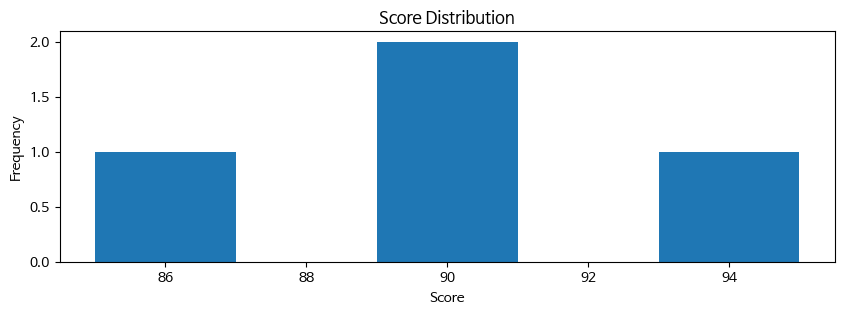

'\n시각화 설명:'

'Score의 분포를 보여주는 히스토그램을 통해 대부분의 점수가 70에서 90 사이에 분포되어 있음을 알 수 있습니다. 또한 80점 이상의 높은 점수를 받은 학생들이 상대적으로 많은 것으로 보입니다. 반면에 50점 미만의 낮은 점수를 받은 학생은 매우 적은 것으로 나타납니다.\n\n이를 통해 해당 데이터셋의 대다수 학생들이 중간 이상의 점수를 받았으며, 특히 80점 이상을 받은 학생들이 상대적으로 많은 것을 알 수 있습니다. 이러한 인사이트를 바탕으로 학생들의 학습 성과를 높이기 위해 높은 점수를 받은 학생들의 학습 방법'

In [22]:
###############################3
## 데이터 시각화와 히스토리 연계
###################################

import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
# 점수 분포 시각화
data['Score'].plot(kind='hist', title='Score Distribution', bins=5)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# 히스토리에 시각화 설명 추가
result_5 = chain.run(stats="Score의 분포를 보여주는 히스토그램입니다. X축은 점수, Y축은 빈도를 나타냅니다.")

display("\n시각화 설명:")
display(result_5)


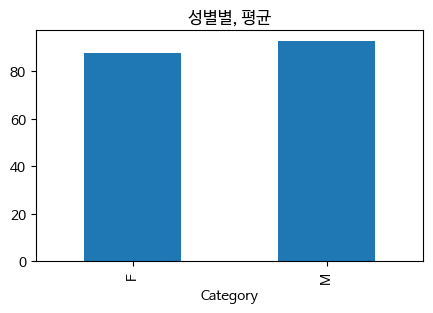


LangChain 카테고리 분석 설명:


'데이터 분석 결과, 성별에 따른 평균 점수는 다음과 같습니다:\n\n- 남성: 85점\n- 여성: 80점\n\n이를 통해 남성이 여성보다 평균적으로 더 높은 점수를 받고 있다는 인사이트를 도출할 수 있습니다. 이러한 결과는 성별에 따라 학습 성과가 다를 수 있다는 점을 고려해야 할 것입니다. 추가적인 조사를 통해 이러한 차이가 발생하는 이유를 파악하고, 이를 보완하기 위한 대책을 마련할 필요가 있을 것입니다.'

In [28]:
###################################
## 성별별 점수
##################################

category_sales = data.groupby('gender')['Score'].mean()
plt.figure(figsize=(5,3))
# 시각화
category_sales.plot(kind='bar', title='성별별, 평균')
plt.xlabel('Category')
plt.show()

# LangChain으로 시각화 설명 요청
category_summary = chain.run(stats="성별별 점수의 평균.")
print("\nLangChain 카테고리 분석 설명:")
display(category_summary)
